# Today you are a Data Scientist at Tesla! 

You have been assigned a new project to look at car sales from Quarters 1-2 in California for 2019 to make predictions as to which cars will be sold more than the others in Q3 and Q4, to ensure enough inventory to meet demands!

### If running this notebook in Google Colab, run the following cell first to mount your Google Drive

This mounts your Google Drive at the location `/content/drive` on the virtual machine running this notebook.

In [292]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 1: Load the data

### Import the modules

1. We'll be using numpy, pandas and matplotlib, so we start by importing them.

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the data

2. Use pandas to read in the CSV file containing the sales data for Quarters 1 and 2. The file is called `sales_Q12_2019.csv`.

    Note: Update `filepath` below to be where you saved the `sales_Q12_2019.csv` file (either on your computer if you're running the notebook locally, or in Google Drive if you're using Google Colab).

In [294]:
# my copy of the Tesla sales data is located in my drive at /Datasets/week_1/
filepath = '/content/drive/My Drive/FourthBrain/Assignments/Week_1/sales_Q12_2019.csv'
df_sales = pd.read_csv(filepath)

3. Examine the data's shape and first few rows.

In [295]:
print('Shape: ', df_sales.shape)
print(df_sales.head())

Shape:  (5837, 76)
   main_S60_1  main_S60_2  main_type_SP100D  ...   MSRP  dealer_state        date
0           0           0                 0  ...  44610    California  2019-04-28
1           0           0                 0  ...  41505    California  2019-03-14
2           0           0                 0  ...  58890    California  2019-06-12
3           0           0                 0  ...  51055    California  2019-03-04
4           0           0                 0  ...  70830    California  2019-01-23

[5 rows x 76 columns]


### Clean the data

4. Notice that our dataset only contains dealers in California, so we can remove the `dealer_state` column. We also will be removing the `date` column (while we could possibly extract useful information from the date, we won't be using it for this exercise). Use the `.drop()` method to remove the two columns ([docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)).

    Use the `.head()` method to verify that they were removed correctly. If the DataFrame wasn't modified make sure you included the attribute `inplace=True` in the `.drop()` method.

In [296]:
df_sales = df_sales.drop(columns=['dealer_state', 'date'])
df_sales.head()

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44610
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41505
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58890
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51055
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70830


In [297]:
df_sales.shape

(5837, 74)

### Read in the second dataset

5. Follow the same syntax as above to read in the `sales_Q34_2019.csv` dataset. Note that this dataset doesn't have the `dealer_state` or `date` column, so we don't need to do the same cleanup.

    After you've read in the data, use the `.head()` method to take a look at the first few rows.

In [298]:
df_pred = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Week_1/sales_Q34_2019.csv')
df_pred.head()

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51355
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71580
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66790
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72330
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55370


In [299]:
df_pred.shape

(6666, 74)

## Task 2: Set up a regression problem 

We will be building a model to predict the number of each car type sold.

If we look at the columns in the dataset, we'll notice that the first 73 tell us which type of car it is. For example, the row at index 1 has a 1 in these three columns: `main_type_S100D`, `engine_A`, and `sales_8`. Any other rows that have 1's in these same columns refers to the same car. You'll see index 18 is the same.

For each of these unique combinations, we will be counting up the number of cars sold. Note that the final column (MSRP) will not be used.

We will count up the number of rows for each unique combination of values for the first 73 columns.

Since we will be doing this same calculation for both `df_sales` (the training set) and `df_pred` (the test set), we will write a function to avoid duplicating code.

1. Write the function `get_features_and_targets` that takes in a quarterly sales DataFrame and produces matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ has a row for each unique car ID and the corresponding row in $\mathbf{Y}$ has the number of those cars sold in the quarter.

    Note: For the `df_sales` dataset, there are 66 types of cars, so $\mathbf{X}$ should have 66 rows and 73 columns.

In [300]:
def get_features_and_targets(df):
  df = df.drop(["MSRP"], axis = 1).value_counts().reset_index()
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  return X,y

2. Use the `get_features_and_targets()` function to create $\mathbf{X}$, $\mathbf{Y}$ pairs for both the training data (`df_sales`) and the test data (`df_pred`).

In [301]:
X_train, y_train = get_features_and_targets(df_sales)
X_test, y_test = get_features_and_targets(df_pred)

3. Verify that the shapes of the four numpy arrays you just created are correct.

    The training set should have 66 datapoints and the test set should have 71 rows. Verify this by looking at the number of rows in $\mathbf{X}$ and number of values in $\mathbf{Y}$.
    
    Both $\mathbf{X}$'s should have 73 columns.

In [302]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (66, 73)
X_test shape:  (71, 73)
y_train shape:  (66,)
y_test shape:  (71,)


Note that the Q12 and Q34 datasets contain differing numbers of distinct cars. Thus some new models were introduced by Q3, but were any discontinued by the beginning of Q3? Let's find out.

4. Print the total number of types of cars (e.g. types of cars that were sold in either Q12, Q34, or both). In mathematical notation, if the set of cars sold in Q12 is $\mathcal{A}$ and the set of cars sold in Q34 is $\mathcal{B}$, we're asking for the size of the *union* of these two sets $|\mathcal{A} \cup \mathcal{B}|$.

    Note: The notation $|\cdots|$ indicates measurement of the size of a set (the number of distinct items). (Mathematicians usually refer to it as the *cardinality*.)
    
    Hint: Create a single DataFrame with all the data and use the `get_features_and_targets()` function.

In [303]:
tempdf = pd.concat([df_sales, df_pred], join='inner')
Xtemp, ytemp = get_features_and_targets(tempdf)
print("Total number of types of cars is: ", ytemp.shape[0])

Total number of types of cars is:  80


5. A handy little fact from set theory is that $|\mathcal{A} \cup \mathcal{B}| = |\mathcal{A}| + |\mathcal{B}| - |\mathcal{A} \cap \mathcal{B}|$, where $\cap$ is the *intersection* of $\mathcal{A}$ and $\mathcal{B}$, things that are in **both** $\mathcal{A}$ and $\mathcal{B}$. Use this fact, and what you've computed above, to print the number of models that were sold in both Q12 and Q34.

In [304]:
bothQuarters = y_train.shape[0] + y_test.shape[0] - ytemp.shape[0]
print("Number of models sold in both Q12 and Q34: ", bothQuarters)

Number of models sold in both Q12 and Q34:  57


6. How many cars that were sold in Q12 were not sold in Q34?

In [305]:
Q12only = y_train.shape[0] - bothQuarters
Q12only

9

7. How many cars were sold in Q34 but not in Q12?

In [306]:
Q34only = y_test.shape[0] - bothQuarters
Q34only

14

## Task 3: Visualize the training and test targets

This is open-ended and we're not expecting a particular visualization, just show us what comes comes to your mind!

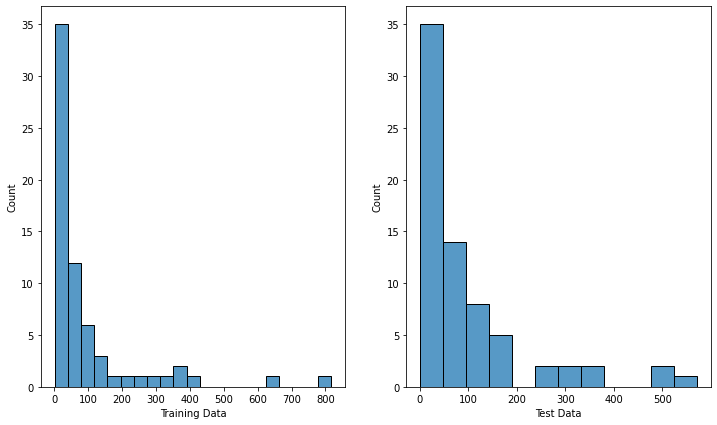

In [307]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,7))
sns.histplot(x=y_train, ax=ax1)
sns.histplot(x=y_test,ax=ax2)
ax1.set(xlabel='Training Data')
ax2.set(xlabel='Test Data')
plt.show()

## Task 4: Fit a linear model with gradient descent

1. Set hyperparameters for learning rate and maximum number of iterations through the training data.

In [308]:
# these are good starting values, though you can play around with them
s_learning_rate = 0.001
s_max_iteration = 1000

### Hypothesis Function

2. Define your hypothesis function $h(\cdot)$ (which you use to make predictions $\hat{\mathbf{Y}}$ as the matrix product of your feature data $\mathbf{X}$ and parameters $\boldsymbol{\theta}$. $\boldsymbol{\theta}$, which you'll initialize in the training loop (below) is a column vector with a value for each feature in the training data, plus one for bias.

    Note: We'll deal with adding the column of 1's to $\mathbf{X}$ below in the gradient descent function, so don't worry about it now.

In [309]:
def h(theta, X):
    return np.dot(X, theta)

3. Define your loss function as the MSE (mean squared error) between your actual and predicted $\mathbf{Y}$ values. 

    Recall that the predicted $\mathbf{Y}$ values, $\hat{\mathbf{Y}}$, are a function of $\boldsymbol{\theta}$ and $\mathbf{X}$.


In [310]:
def loss(theta, X, y):
    return np.sum(np.square(y - h(theta, X))) / len(X)

### Gradient of Hypothesis Function

One can verify through straightforward (if somewhat tedious) multivariable calculus that the gradient of the loss function $J$ with respect to the parameters $\theta$ is 

$$ \frac{\partial J}{\partial \boldsymbol{\theta}} = - \frac{1}{m} X^T \cdot (Y - \hat{Y})$$

Where $m$ is the number of data samples, the number of rows in $\mathbf{X}$ and $\mathbf{Y}$.

Note that the $\mathbf{X}$ here is the one that has been augmented with a bias column. 

4. Write the `gradient()` function to compute this gradient.

In [311]:
def gradient(theta, X, y):
    return -np.dot(X.T, y - h(theta, X)) / len(X)

### Gradient Descent

5. Complete the `stochastic_gradient_descent()` function to train your linear regression model with gradient descent, i.e. calculate $\frac{\partial J}{\partial \theta}$ and update $\theta$. Recall that the general gradient descent update formula is $\theta := \theta - \alpha \frac{\partial J}{\partial \theta}$, with $\alpha$ the stepsize. We've provided the skeleton of a stochastic gradient descent function, but you're welcome to experiment with batch and/or minibatch gradient descent. Also recall that the aforementioned gradient descent methods differ in how frequently they calculate $\frac{\partial J}{\partial \theta}$ and update $\theta$. Notice in the first step we initialize $\boldsymbol{\theta}$ to all zeros and we temporarily prepend a column of $1$'s to the features, which corresponds to the bias parameter.

    Hint: Be mindful of the shapes of the arrays that you pass into the `gradient()` function. It should be two 2D arrays.

In [312]:
def stochastic_gradient_descent(X, y, learning_rate, max_iteration, print_interval):
    theta = np.zeros((X.shape[1] + 1, 1))
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])  # prepend a column of 1's
    cost = np.zeros(max_iteration)  # initialize cost as array of zeros
    for i in range(max_iteration):
        for j in range(X.shape[0]):
            d_theta = gradient (theta, X_with_ones[j : j + 1, :], y[j : j + 1])
            theta = theta - learning_rate * d_theta
        cost[i] = loss(theta, X_with_ones, y) # Update the cost array for the current iteration
    if i % print_interval == 0 :
        print('iteration : ', i, ' loss : ', loss(theta, X_with_ones, y))
    return theta, cost

6. Now we can run the `stochastic_gradient_descent()` function to find the optimal theta.

In [313]:
s_theta, s_cost = stochastic_gradient_descent(X_train, y_train, s_learning_rate, s_max_iteration, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

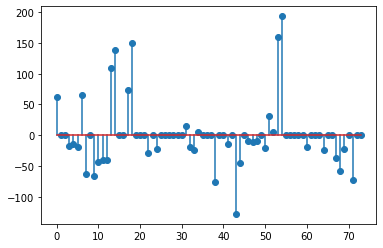

In [314]:
plt.stem(np.squeeze(s_theta))

### Generate Predictions from Test Data

7. Use `s_theta` to make predictions on the test set (`X_test`).

    Hint: Make sure to prepend the column of 1's onto `X_test` (just like it's done in the `stochastic_gradient_descent()` function).

In [315]:
y_pred_GD = h(s_theta, np.hstack([np.ones([len(X_test), 1]), X_test]))

# Since our target is non-negative, we set any negative predictions to 0.
y_pred_GD[y_pred_GD < 0] = 0

8. Calculate the MSE and R^2 score.

In [316]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

print('GD Mean Squared Error: ', MSE(y_test, y_pred_GD))
print('GD R^2 Score: ', r2_score(y_test, y_pred_GD))

GD Mean Squared Error:  5702.208265828383
GD R^2 Score:  0.6300187885391408


### Visualize the predicted and actual test labels

9. Make a plot showing both the true values (`y_test`) and the predicted values (`y_pred_GD`).

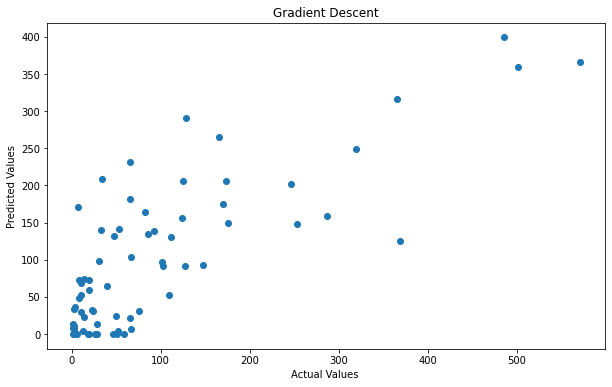

In [317]:
 plt.figure(figsize=(10,6)) 
 plt.scatter(y_test, y_pred_GD)
 plt.xlabel('Actual Values ')
 plt.ylabel('Predicted Values')
 plt.title('Gradient Descent')
 plt.show();

## Task 5: Normal Equations

Gradient Descent is an iterative method for converging on the solution, though we can also compute the solution directly using the normal equation. Gradient Descent is generally preferred because it can converge quickly even with a large dataset, but since our training dataset isn't very large, we can use the normal equation.

$$\boldsymbol{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$$ 
$$\hat{Y} = X \cdot \boldsymbol{\theta}$$

We'll compare our predictions with the ones we obtained using gradient descent.

Remember we still have a bias term, so $\boldsymbol{\theta}$ is of size 74x1 (73 for the unique ID features, 1 for the bias).

1. Complete the `normal_equations_solution()` function below.

    Hint: numpy's `linalg.pinv` efficiently computes the matrix $(X^T \cdot X)^{-1} \cdot X^T$.

In [318]:
def normal_equations_solution(X, y):
    X_with_ones = np.hstack([np.ones([X.shape[0], 1]), X])
    return np.dot(np.linalg.pinv(X_with_ones), y)

2. Use the `normal_equations_solution()` function to compute `y_pred_NE`.

    The code should be the same as above, just use `n_theta` instead of `s_theta`.

In [319]:
n_theta = normal_equations_solution(X_train, y_train)
y_pred_NE = h(n_theta, np.hstack([np.ones([len(X_test), 1]), X_test]))

# Set any negative predictions to 0
y_pred_NE[y_pred_NE < 0] = 0

3. Calculate the MSE and R^2 score.

In [320]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('NE Mean Squared Error: ', mean_squared_error(y_test, y_pred_NE))
print('NE R^2 Score: ', r2_score(y_test, y_pred_NE))

NE Mean Squared Error:  6199.3036644195145
NE R^2 Score:  0.5977653265103127


4. Make a plot showing both the true values (`y_test`) and the predicted values (`y_pred_NE`).

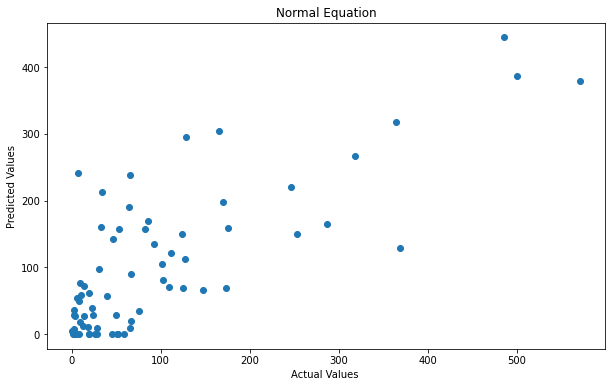

In [321]:
 plt.figure(figsize=(10,6)) 
 plt.scatter(y_test, y_pred_NE)
 plt.xlabel('Actual Values ')
 plt.ylabel('Predicted Values')
 plt.title('Normal Equation')
 plt.show();

### Regularized Normal Equations

Recall that our training features array `X_train` has 66 rows and 73 columns, thus wider than it is tall. This suggests the regularized normal equations might perform better.

$$\boldsymbol{\theta} = (X^T \cdot X + \lambda m I)^{-1} \cdot X^T \cdot Y$$

Here, $\lambda$ is the regularization parameter and $m$ is the number of rows in $X$.

5. Complete the `regularized_normal_equations_solution()` equation.

In [322]:
def regularized_normal_equations_solution(X, y, regularization_param):
    X_with_ones = np.hstack([np.ones([len(X), 1]), X])
    return np.dot(
        np.linalg.inv(np.dot(X_with_ones.T, X_with_ones) + regularization_param * len(X) * np.identity(X_with_ones.shape[1])), np.dot(X_with_ones.T, y))

6. Complete the code snippet below to calculate the MSE and R^2 values for each of the potential regularization parameters to determine the optimal.

    Does it outperform the standard normal equation?

In [323]:
regularization_params = np.linspace(0.001, 0.01, 10)

for regularization_param in regularization_params:
    theta_temp = regularized_normal_equations_solution(X_train, y_train, regularization_param)
    y_pred_N_reg = h(theta_temp, np.hstack([np.ones([len(X_test), 1]), X_test]))
    y_pred_N_reg[y_pred_N_reg < 0] = 0
    print('For regularization parameter', regularization_param)
    # Print the MSE and R^2 value
    print('RNE Mean Squared Error: ', mean_squared_error(y_test, y_pred_N_reg))
    print('RNE R^2 Score: ', r2_score(y_test, y_pred_N_reg))

For regularization parameter 0.001
RNE Mean Squared Error:  5920.159564029449
RNE R^2 Score:  0.6158772697470027
For regularization parameter 0.002
RNE Mean Squared Error:  5789.114544987607
RNE R^2 Score:  0.6243799747764847
For regularization parameter 0.003
RNE Mean Squared Error:  5715.482554459258
RNE R^2 Score:  0.6291575016201127
For regularization parameter 0.004
RNE Mean Squared Error:  5682.2396324633555
RNE R^2 Score:  0.6313144303009272
For regularization parameter 0.005
RNE Mean Squared Error:  5674.866662818309
RNE R^2 Score:  0.6317928169389049
For regularization parameter 0.006
RNE Mean Squared Error:  5682.3563700743225
RNE R^2 Score:  0.6313068559155811
For regularization parameter 0.007
RNE Mean Squared Error:  5698.57797773518
RNE R^2 Score:  0.6302543355981152
For regularization parameter 0.008
RNE Mean Squared Error:  5719.786363627019
RNE R^2 Score:  0.6288782539224571
For regularization parameter 0.009000000000000001
RNE Mean Squared Error:  5745.2324440993625
R

## Task 6: Non-linear Regression Models (GLM, DT) 

### Generalized Linear Models

Statsmodels has a `GLM` class for Generalized Linear Models. Here we import and build the model.

The `GLM` class takes the training labels, training features, and family, which is the family of distributions to which we assume our prediciton errors belong. Some potentially good choices for family include Gaussian, Gamma, and Logit.

1. Run the code below and review the results.

In [324]:
import statsmodels.api as sm
X_train_with_ones = sm.add_constant(X_train)
glm = sm.GLM(y_train, X_train_with_ones, family=sm.families.Gaussian())
glm_results = glm.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   66
Model:                            GLM   Df Residuals:                       35
Model Family:                Gaussian   Df Model:                           30
Link Function:               identity   Scale:                          17311.
Method:                          IRLS   Log-Likelihood:                -394.77
Date:                Wed, 09 Feb 2022   Deviance:                   6.0590e+05
Time:                        21:02:07   Pearson chi2:                 6.06e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6077     49.748      1.721      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


2. Use the model created above to generate predictions.

In [325]:
#X_test_with_ones = sm.add_constant(X_test)
y_pred_GLM = glm_results.predict(X_test_with_ones)
y_pred_GLM[y_pred_GLM < 0] = 0

3. Calculate the MSE and R^2 score.

In [326]:
print('GLM Mean Squared Error: ', mean_squared_error(y_test, y_pred_GLM))
print('GLM R^2 Score: ', r2_score(y_test, y_pred_GLM))

GLM Mean Squared Error:  6199.3036644195145
GLM R^2 Score:  0.5977653265103127


4. Make a plot showing both the true values (`y_test`) and the predicted values (`y_pred_GLM`).

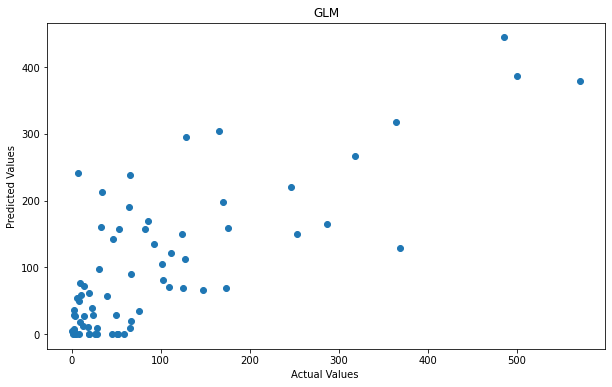

In [327]:
 plt.figure(figsize=(10,6)) 
 plt.scatter(y_test, y_pred_GLM)
 plt.xlabel('Actual Values ')
 plt.ylabel('Predicted Values')
 plt.title('GLM')
 plt.show();

### Random Forest Regression

5. Use the `RandomForestRegressor` from scikit-learn to train a model.

    The relevant parameters are the `max_depth` of the trees and the `random_state` (used so your code will always yield the same results).
    
    Note: we don't need to add a column of ones for non-linear models like Random Forests.

In [328]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

6. Use the model created above to generate predictions.

In [329]:
y_pred_RF = regr.predict(X_test)
y_pred_RF[y_pred_RF < 0] = 0

7. Calculate the MSE and R^2 score.

In [330]:
print('RF Mean Squared Error: ', mean_squared_error(y_test, y_pred_RF))
print('RF R^2 Score: ', r2_score(y_test, y_pred_RF))

RF Mean Squared Error:  4308.133720398956
RF R^2 Score:  0.720471708730718


8. Make a plot showing both the true values (`y_test`) and the predicted values (`y_pred_GLM`).

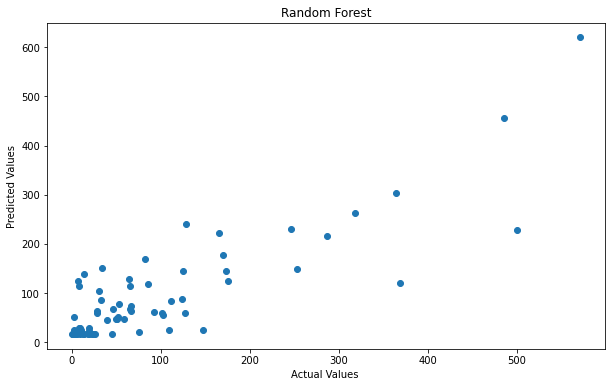

In [331]:
 plt.figure(figsize=(10,6)) 
 plt.scatter(y_test, y_pred_RF)
 plt.xlabel('Actual Values ')
 plt.ylabel('Predicted Values')
 plt.title('Random Forest')
 plt.show();


## Task 7: Compare the Models

1. Populate the table below with the results of your experiments above. Which models performed best?

|Method      |RMSE             |R2               |
|------------|-----------------|-----------------|
| Gradient Descent | 5702.2 | 0.630 |
| Normal Equations | 6199.3 | 0.598 |
| Regularized Normal Equations | 5674.9 | 0.632 |
| Generalized Linear Model (GLM) | 6199.3 | 0.598 |
| Random Forests | 4308.1 | 0.720 |
